## Вариант 4. Выбор признаков. Датасет: https://www.kaggle.com/uciml/german-credit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
# Загрузка датасета
data = pd.read_csv('german_credit_data.csv', index_col='Unnamed: 0')
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


#### Описание набора данных:
Данный датасет содержит информацию о 1000 человеках, которые брали кредит в банке. Каждая запись представляет собой информацию о человеке и его кредитной истории. В каждой записи присутствуют различные атрибуты, которые описывают заемщика, такие как возраст, пол, профессия, тип жилья, сумма накоплений, наличие текущего счета, сумма кредита, срок кредита и цель кредита.

#### Задача:
Задачей является классификация заемщиков на заемщиков с высокими и низкими кредитными рисками, чтобы банк мог принимать более обоснованные решения о выдаче кредита.

#### Целевая переменная:
В данном датасете целевой переменной является класс риска (good/bad). Мы будем строить модель, которая будет предсказывать этот класс на основе остальных атрибутов.

#### Факторные переменные:
Факторные переменные (признаки) включают все остальные атрибуты из датасета, за исключением целевой переменной. В данном случае, это Age (возраст), Sex (пол), Job (уровень опыта работы от 0 до 3), Housing (жилье), Saving accounts (сберегательный счет), Checking account (рассчетный счет), Credit amount (сумма кредита в DM `Deutsch Mark`), Duration (продолжительность кредита) и Purpose (цель).

In [29]:
data.shape # Размер датасета

(1000, 9)

In [30]:
data.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


Статистика числовых признаков:

In [31]:
data.describe() 

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Из данной статистики видим, что заемщики в среднем в возрасте около 35 лет, большинство заемщиков имеют средний уровень опыта работы (2), средняя сумма кредита чуть более 3000, а средняя продолжительность около 20 месяцев.

Статистика категориальных признаков:

In [32]:
data.describe(include=['O'])

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


Из статистики видим, что заемщики в основном мужчины, количество сбережений на счетах - небольшое, а самая частая цель кредита - покупка машины.

### Матрица корреляций

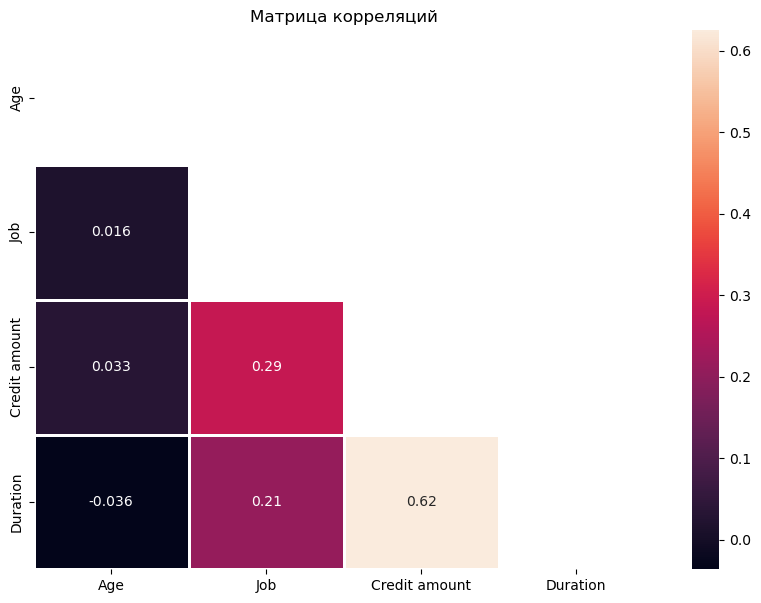

In [33]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,7))
plt.title('Матрица корреляций')
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=2);

Из матрицы видим довольно сильную корреляцию между суммой и длительностью кредита, что логично. Больше кредит - дольше продолжительность, и наоборот.

In [34]:
data.isna().sum() # Проверка пустых значений

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Пропуски содержатся только в колонках с данными о суммах на счетах, причем в Checking account почти 400 пропусков - 40% данных датасета

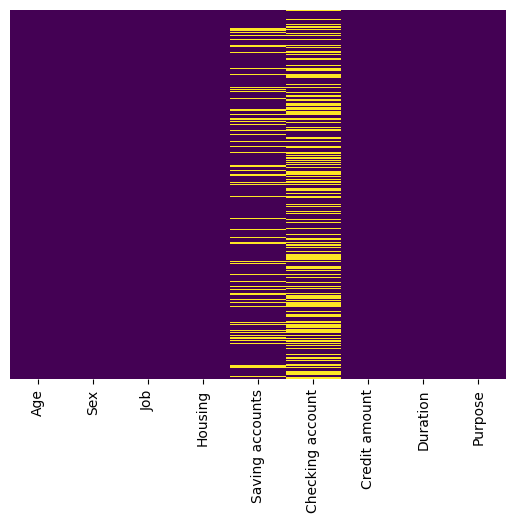

In [35]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis'); # визуализация пропусков

Удаляем столбец "Checking account" так как в нем большое количество пропусков (почти 40%), что может помешать в дальнейшем обучении модели.

In [36]:
data.drop(columns=["Checking account"])

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,1169,6,radio/TV
1,22,female,2,own,little,5951,48,radio/TV
2,49,male,1,own,little,2096,12,education
3,45,male,2,free,little,7882,42,furniture/equipment
4,53,male,2,free,little,4870,24,car
...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,1736,12,furniture/equipment
996,40,male,3,own,little,3857,30,car
997,38,male,2,own,little,804,12,radio/TV
998,23,male,2,free,little,1845,45,radio/TV


In [37]:
data.dropna(inplace=True) # удаляем остальные пустые значения, не удаляя столбец

Количество повторяющихся строк

In [38]:
len(data)-len(data.drop_duplicates())

0

#### Разбиение датасета на трейновую и тестовую выборки. В качестве целевой переменной выберем сумму кредита. Так как в качестве целевой переменной мы выбрали сумму кредита, это задача является задачей регрессии

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Разделение на факторные переменные (X) и целевую переменную (y)
X = data.drop('Credit amount', axis=1)
y = data['Credit amount']
# Применение One-Hot Encoding (приводим категориальные значаения к числовым)
X_encoded = pd.get_dummies(X)

# Разделение на обучающую и тестовую выборки в соотношении 80:20
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [49]:
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка эффективности модели с помощью среднеквадратической ошибки (MSE) и R2_score
mse = mean_squared_error(y_test, y_pred)
r2_score = model.score(X_test, y_test)
r2_score

0.5268711605705262

In [53]:
mse

4982632.7650209945